Most code form https://www.youtube.com/watch?v=ViaGirGFJZY&t=259s

https://www.youtube.com/watch?v=3IA0V9UuoPc&t=1071s


Run code from top to bottom

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

## **-Game Prediction-**




### Game Prediction

In [ ]:
og_2024_data = pd.read_csv("/content/drive/MyDrive/NFL data/pbp-2024.csv")

og_2024_scores = pd.read_csv("/content/drive/MyDrive/NFL data/raw_2024_scores.csv")

In [ ]:
og_2024_data['GameDate'] = pd.to_datetime(og_2024_data['GameDate']).dt.strftime('%m/%d/%Y')
nfl_play = pd.concat([og_2024_data, og_2024_data])
nfl_play.head()

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
0,2024122907,12/29/2024,3,7,3,GB,MIN,1,10,16,...,0,0,CENTER,84,OPP,0,NaN,0,NaN,0
1,2024122907,12/29/2024,3,9,44,MIN,GB,0,0,0,...,0,0,NaN,100,OPP,0,NaN,0,NaN,0
2,2024122907,12/29/2024,3,9,44,MIN,GB,0,0,15,...,0,0,NaN,85,OPP,0,NaN,0,NaN,0
3,2024122907,12/29/2024,3,9,50,MIN,GB,1,10,18,...,0,0,NaN,82,OPP,0,NaN,0,NaN,0
4,2024122907,12/29/2024,3,15,0,MIN,GB,0,0,35,...,0,0,NaN,65,OPP,0,NaN,0,NaN,0


In [ ]:
unique_visitor_teams_2024 = og_2024_scores['Visitor'].unique()
unique_home_teams_2024 = og_2024_scores['Home'].unique()

all_unique_teams = set(unique_visitor_teams_2024).union(set(unique_home_teams_2024))

unique_teams_abbrev_2024 = set(nfl_play['OffenseTeam'].dropna().unique()).union(set(nfl_play['DefenseTeam'].dropna().unique()))

all_unique_abbrev = unique_teams_abbrev_2024

all_unique_teams, all_unique_abbrev

({'Arizona Cardinals',
  'Atlanta Falcons',
  'Baltimore Ravens',
  'Buffalo Bills',
  'Carolina Panthers',
  'Chicago Bears',
  'Cincinnati Bengals',
  'Cleveland Browns',
  'Dallas Cowboys',
  'Denver Broncos',
  'Detroit Lions',
  'Green Bay Packers',
  'Houston Texans',
  'Indianapolis Colts',
  'Jacksonville Jaguars',
  'Kansas City Chiefs',
  'Las Vegas Raiders',
  'Los Angeles Chargers',
  'Los Angeles Rams',
  'Miami Dolphins',
  'Minnesota Vikings',
  'New England Patriots',
  'New Orleans Saints',
  'New York Giants',
  'New York Jets',
  'Philadelphia Eagles',
  'Pittsburgh Steelers',
  'San Francisco 49ers',
  'Seattle Seahawks',
  'Tampa Bay Buccaneers',
  'Tennessee Titans',
  'Washington Commanders'},
 {'ARI',
  'ATL',
  'BAL',
  'BUF',
  'CAR',
  'CHI',
  'CIN',
  'CLE',
  'DAL',
  'DEN',
  'DET',
  'GB',
  'HOU',
  'IND',
  'JAX',
  'KC',
  'LA',
  'LAC',
  'LV',
  'MIA',
  'MIN',
  'NE',
  'NO',
  'NYG',
  'NYJ',
  'PHI',
  'PIT',
  'SEA',
  'SF',
  'TB',
  'TEN',
  '

In [ ]:
team_mapping = {
    'Arizona Cardinals': 'ARI',
    'Atlanta Falcons': 'ATL',
    'Baltimore Ravens': 'BAL',
    'Buffalo Bills': 'BUF',
    'Carolina Panthers': 'CAR',
    'Chicago Bears': 'CHI',
    'Cincinnati Bengals': 'CIN',
    'Cleveland Browns': 'CLE',
    'Dallas Cowboys': 'DAL',
    'Denver Broncos': 'DEN',
    'Detroit Lions': 'DET',
    'Green Bay Packers': 'GB',
    'Houston Texans': 'HOU',
    'Indianapolis Colts': 'IND',
    'Jacksonville Jaguars': 'JAX',
    'Kansas City Chiefs': 'KC',
    'Las Vegas Raiders': 'LV',
    'Los Angeles Chargers': 'LAC',
    'Los Angeles Rams': 'LA',
    'Miami Dolphins': 'MIA',
    'Minnesota Vikings': 'MIN',
    'New England Patriots': 'NE',
    'New Orleans Saints': 'NO',
    'New York Giants': 'NYG',
    'New York Jets': 'NYJ',
    'Philadelphia Eagles': 'PHI',
    'Pittsburgh Steelers': 'PIT',
    'San Francisco 49ers': 'SF',
    'Seattle Seahawks': 'SEA',
    'Tampa Bay Buccaneers': 'TB',
    'Tennessee Titans': 'TEN',
    'Washington Commanders': 'WAS'
}

og_2024_scores['Visitor'] = og_2024_scores['Visitor'].map(team_mapping)
og_2024_scores['Home'] = og_2024_scores['Home'].map(team_mapping)

new_scores = og_2024_scores


Merging the 2 stat sheets

In [ ]:
def make_key(date, team1, team2):
    teams = sorted([team1, team2])
    return f"{pd.to_datetime(date).strftime('%Y-%m-%d')}_{teams[0]}_{teams[1]}"
new_scores['JoinKey'] = new_scores.apply(
    lambda row: make_key(row['Date'], row['Visitor'], row['Home']),
    axis=1
)
nfl_play['JoinKey'] = nfl_play.apply(
    lambda row: make_key(row['GameDate'], row['OffenseTeam'], row['DefenseTeam']),
    axis=1
)
merged = nfl_play.merge(new_scores, on='JoinKey', how='left')
merged.drop(columns='JoinKey', inplace=True)
merged.to_csv('merged_nfl_data.csv', index=False)
merged.head(30)

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,IsNoPlay,PenaltyType,PenaltyYards,Week,Date,Visitor,VisitorScore,Home,HomeScore,OT
0,2024122907,12/29/2024,3,7,3,GB,MIN,1,10,16,...,0,NaN,0,Week 17,12/29/2024,GB,25,MIN,27,NaN
1,2024122907,12/29/2024,3,9,44,MIN,GB,0,0,0,...,0,NaN,0,Week 17,12/29/2024,GB,25,MIN,27,NaN
2,2024122907,12/29/2024,3,9,44,MIN,GB,0,0,15,...,0,NaN,0,Week 17,12/29/2024,GB,25,MIN,27,NaN
3,2024122907,12/29/2024,3,9,50,MIN,GB,1,10,18,...,0,NaN,0,Week 17,12/29/2024,GB,25,MIN,27,NaN
4,2024122907,12/29/2024,3,15,0,MIN,GB,0,0,35,...,0,NaN,0,Week 17,12/29/2024,GB,25,MIN,27,NaN
5,2024122907,12/29/2024,2,2,0,GB,MIN,0,0,0,...,0,NaN,0,Week 17,12/29/2024,GB,25,MIN,27,NaN
6,2025010401,01/04/2025,2,5,32,PIT,CIN,0,0,0,...,0,NaN,0,Week 18,01/04/2025,CIN,19,PIT,17,NaN
7,2025010401,01/04/2025,2,6,33,PIT,CIN,0,0,0,...,0,NaN,0,Week 18,01/04/2025,CIN,19,PIT,17,NaN
8,2025010401,01/04/2025,2,6,37,CIN,PIT,4,1,37,...,0,NaN,0,Week 18,01/04/2025,CIN,19,PIT,17,NaN
9,2025010401,01/04/2025,2,7,20,CIN,PIT,3,6,42,...,0,NaN,0,Week 18,01/04/2025,CIN,19,PIT,17,NaN


In [ ]:

import pandas as pd
import numpy as np

merged['HomeWon'] = merged['HomeScore'] > merged['VisitorScore']

merged[['Date', 'Home', 'Visitor', 'HomeScore', 'VisitorScore', 'HomeWon']].head(), merged[['Date', 'Home', 'Visitor', 'HomeScore', 'VisitorScore', 'HomeWon']].head()

(         Date Home Visitor  HomeScore  VisitorScore  HomeWon
 0  12/29/2024  MIN      GB         27            25     True
 1  12/29/2024  MIN      GB         27            25     True
 2  12/29/2024  MIN      GB         27            25     True
 3  12/29/2024  MIN      GB         27            25     True
 4  12/29/2024  MIN      GB         27            25     True,
          Date Home Visitor  HomeScore  VisitorScore  HomeWon
 0  12/29/2024  MIN      GB         27            25     True
 1  12/29/2024  MIN      GB         27            25     True
 2  12/29/2024  MIN      GB         27            25     True
 3  12/29/2024  MIN      GB         27            25     True
 4  12/29/2024  MIN      GB         27            25     True)

### Enter 2 team abrivations below




In [ ]:
import pandas as pd
import numpy as np

all_data = merged
#Enter team name
hometeam = input("Enter Home Team Abbreviation: ")
visitorteam = input("Enter Visitor Team Abbreviation: ")
upcoming_games = pd.DataFrame({'Home': [hometeam], 'Visitor': [visitorteam]})

avg_points_scored_home = all_data.groupby('Home')['HomeScore'].mean()
avg_points_scored_visitor = all_data.groupby('Visitor')['VisitorScore'].mean()

avg_points_allowed_home = all_data.groupby('Home')['VisitorScore'].mean()
avg_points_allowed_visitor = all_data.groupby('Visitor')['HomeScore'].mean()

overall_avg_points_scored = (avg_points_scored_home + avg_points_scored_visitor) / 2
overall_avg_points_allowed = (avg_points_allowed_home + avg_points_allowed_visitor) / 2

home_wins = all_data.groupby('Home')['HomeWon'].sum()
visitor_wins = all_data.groupby('Visitor').apply(lambda x: len(x) - x['HomeWon'].sum())

total_games_home = all_data['Home'].value_counts()
total_games_visitor = all_data['Visitor'].value_counts()

overall_wins = home_wins + visitor_wins
total_games = total_games_home + total_games_visitor

win_rate = overall_wins / total_games

team_features = pd.DataFrame({
    'AvgPointsScored': overall_avg_points_scored,
    'AvgPointsAllowed': overall_avg_points_allowed,
    'WinRate': win_rate
})

team_features.reset_index(inplace=True)
team_features.rename(columns={'Home': 'Team'}, inplace=True)

Enter Home Team Abbreviation: NE
Enter Visitor Team Abbreviation: DET


<ipython-input-185-5df911bc2de8>:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  visitor_wins = all_data.groupby('Visitor').apply(lambda x: len(x) - x['HomeWon'].sum())


### Game Prediction

In [ ]:
upcoming_games.head()

,Home,Visitor
0,NE,DET


In [ ]:

all_data['SuccessfulPlay'] = all_data['IsTouchdown'] | (~all_data['IsInterception'] & ~all_data['IsFumble'])

avg_conceded_plays_home = all_data.groupby('Home')['SuccessfulPlay'].mean()

avg_conceded_plays_visitor = all_data.groupby('Visitor')['SuccessfulPlay'].mean()

overall_avg_conceded_plays = (avg_conceded_plays_home + avg_conceded_plays_visitor) / 2

all_data['Turnover'] = all_data['IsInterception'] | all_data['IsFumble']

avg_forced_turnovers_home = all_data.groupby('Home')['Turnover'].mean()

avg_forced_turnovers_visitor = all_data.groupby('Visitor')['Turnover'].mean()

overall_avg_forced_turnovers = (avg_forced_turnovers_home + avg_forced_turnovers_visitor) / 2

team_features_defensive = pd.DataFrame({
    'Team': team_features['Team'].values,
    'AvgPointsDefended': team_features['AvgPointsAllowed'].values,
    'AvgConcededPlays': overall_avg_conceded_plays.values,
    'AvgForcedTurnovers': overall_avg_forced_turnovers.values
})

team_features_combined = team_features.merge(team_features_defensive, on='Team')

team_features_combined.head()

,Team,AvgPointsScored,AvgPointsAllowed,WinRate,AvgPointsDefended,AvgConcededPlays,AvgForcedTurnovers
0,ARI,23.396436,22.733489,0.457546,22.733489,-1.020181,0.021772
1,ATL,23.120159,25.137638,0.472835,25.137638,-1.021514,0.022980
2,BAL,30.091801,21.502370,0.678042,21.502370,-1.014326,0.016056
3,BUF,30.886875,21.776342,0.745873,21.776342,-1.018697,0.020044
4,CAR,20.533577,31.505754,0.307503,31.505754,-1.017596,0.018268


In [ ]:

avg_yards_per_play_home = all_data.groupby('Home')['Yards'].mean()
avg_yards_per_play_visitor = all_data.groupby('Visitor')['Yards'].mean()
overall_avg_yards_per_play = (avg_yards_per_play_home + avg_yards_per_play_visitor) / 2


total_yards_per_game_home = all_data.groupby(['SeasonYear', 'Home'])['Yards'].sum() / all_data.groupby(['SeasonYear', 'Home']).size()
total_yards_per_game_visitor = all_data.groupby(['SeasonYear', 'Visitor'])['Yards'].sum() / all_data.groupby(['SeasonYear', 'Visitor']).size()
overall_avg_yards_per_game = (total_yards_per_game_home + total_yards_per_game_visitor).groupby(level=1).mean()

avg_pass_completion_rate_home = all_data.groupby('Home').apply(lambda x: 1 - x['IsIncomplete'].mean())
avg_pass_completion_rate_visitor = all_data.groupby('Visitor').apply(lambda x: 1 - x['IsIncomplete'].mean())
overall_avg_pass_completion_rate = (avg_pass_completion_rate_home + avg_pass_completion_rate_visitor) / 2

avg_touchdowns_per_game_home = all_data.groupby(['SeasonYear', 'Home'])['IsTouchdown'].sum() / all_data.groupby(['SeasonYear', 'Home']).size()
avg_touchdowns_per_game_visitor = all_data.groupby(['SeasonYear', 'Visitor'])['IsTouchdown'].sum() / all_data.groupby(['SeasonYear', 'Visitor']).size()
overall_avg_touchdowns_per_game = (avg_touchdowns_per_game_home + avg_touchdowns_per_game_visitor).groupby(level=1).mean()

avg_rush_success_rate_home = all_data.groupby('Home').apply(lambda x: x['Yards'][x['IsRush'] == 1].mean())
avg_rush_success_rate_visitor = all_data.groupby('Visitor').apply(lambda x: x['Yards'][x['IsRush'] == 1].mean())
overall_avg_rush_success_rate = (avg_rush_success_rate_home + avg_rush_success_rate_visitor) / 2

new_offensive_features = pd.DataFrame({
    'Team': team_features_combined['Team'],
    'AvgYardsPerPlay': overall_avg_yards_per_play.values,
    'AvgYardsPerGame': overall_avg_yards_per_game.values,
    'AvgPassCompletionRate': overall_avg_pass_completion_rate.values,
    'AvgTouchdownsPerGame': overall_avg_touchdowns_per_game.values,
    'AvgRushSuccessRate': overall_avg_rush_success_rate.values
})

team_features_expanded = team_features_combined.merge(new_offensive_features, on='Team')

team_features_expanded.head()


<ipython-input-188-bc380a52331c>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_pass_completion_rate_home = all_data.groupby('Home').apply(lambda x: 1 - x['IsIncomplete'].mean())
<ipython-input-188-bc380a52331c>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_pass_completion_rate_visitor = all_data.groupby('Visitor').apply(lambda x: 1 - x['IsIncomplete'].mean())
<ipython-input-188-bc380a52331c>

,Team,AvgPointsScored,AvgPointsAllowed,WinRate,AvgPointsDefended,AvgConcededPlays,AvgForcedTurnovers,AvgYardsPerPlay,AvgYardsPerGame,AvgPassCompletionRate,AvgTouchdownsPerGame,AvgRushSuccessRate
0,ARI,23.396436,22.733489,0.457546,22.733489,-1.020181,0.021772,3.995585,7.991171,0.887399,0.056276,5.222833
1,ATL,23.120159,25.137638,0.472835,25.137638,-1.021514,0.022980,4.108988,8.217977,0.888102,0.060988,4.825960
2,BAL,30.091801,21.502370,0.678042,21.502370,-1.014326,0.016056,4.133998,8.267995,0.876289,0.069258,5.092409
3,BUF,30.886875,21.776342,0.745873,21.776342,-1.018697,0.020044,4.006057,8.012114,0.878053,0.073643,4.839956
4,CAR,20.533577,31.505754,0.307503,31.505754,-1.017596,0.018268,3.889028,7.778056,0.878550,0.066200,5.156799


In [ ]:

avg_yards_allowed_per_play_home = all_data.groupby('Home')['Yards'].mean()
avg_yards_allowed_per_play_visitor = all_data.groupby('Visitor')['Yards'].mean()
overall_avg_yards_allowed_per_play = (avg_yards_allowed_per_play_home + avg_yards_allowed_per_play_visitor) / 2

total_yards_allowed_per_game_home = all_data.groupby(['SeasonYear', 'Home'])['Yards'].sum() / all_data.groupby(['SeasonYear', 'Home']).size()
total_yards_allowed_per_game_visitor = all_data.groupby(['SeasonYear', 'Visitor'])['Yards'].sum() / all_data.groupby(['SeasonYear', 'Visitor']).size()
overall_avg_yards_allowed_per_game = (total_yards_allowed_per_game_home + total_yards_allowed_per_game_visitor).groupby(level=1).mean()

avg_pass_completion_allowed_rate_home = all_data.groupby('Home').apply(lambda x: 1 - x['IsIncomplete'].mean())
avg_pass_completion_allowed_rate_visitor = all_data.groupby('Visitor').apply(lambda x: 1 - x['IsIncomplete'].mean())
overall_avg_pass_completion_allowed_rate = (avg_pass_completion_allowed_rate_home + avg_pass_completion_allowed_rate_visitor) / 2

avg_touchdowns_allowed_per_game_home = all_data.groupby(['SeasonYear', 'Home'])['IsTouchdown'].sum() / all_data.groupby(['SeasonYear', 'Home']).size()
avg_touchdowns_allowed_per_game_visitor = all_data.groupby(['SeasonYear', 'Visitor'])['IsTouchdown'].sum() / all_data.groupby(['SeasonYear', 'Visitor']).size()
overall_avg_touchdowns_allowed_per_game = (avg_touchdowns_allowed_per_game_home + avg_touchdowns_allowed_per_game_visitor).groupby(level=1).mean()

avg_rush_success_allowed_rate_home = all_data.groupby('Home').apply(lambda x: x['Yards'][x['IsRush'] == 1].mean())
avg_rush_success_allowed_rate_visitor = all_data.groupby('Visitor').apply(lambda x: x['Yards'][x['IsRush'] == 1].mean())
overall_avg_rush_success_allowed_rate = (avg_rush_success_allowed_rate_home + avg_rush_success_allowed_rate_visitor) / 2

new_defensive_features = pd.DataFrame({
    'Team': team_features_expanded['Team'],
    'AvgYardsAllowedPerPlay': overall_avg_yards_allowed_per_play.values,
    'AvgYardsAllowedPerGame': overall_avg_yards_allowed_per_game.values,
    'AvgPassCompletionAllowedRate': overall_avg_pass_completion_allowed_rate.values,
    'AvgTouchdownsAllowedPerGame': overall_avg_touchdowns_allowed_per_game.values,
    'AvgRushSuccessAllowedRate': overall_avg_rush_success_allowed_rate.values
})

team_features_complete = team_features_expanded.merge(new_defensive_features, on='Team')

team_features_complete


<ipython-input-189-1b313bb3e5d1>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_pass_completion_allowed_rate_home = all_data.groupby('Home').apply(lambda x: 1 - x['IsIncomplete'].mean())
<ipython-input-189-1b313bb3e5d1>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_pass_completion_allowed_rate_visitor = all_data.groupby('Visitor').apply(lambda x: 1 - x['IsIncomplete'].mean())
<ipython-input-18

,Team,AvgPointsScored,AvgPointsAllowed,WinRate,AvgPointsDefended,AvgConcededPlays,AvgForcedTurnovers,AvgYardsPerPlay,AvgYardsPerGame,AvgPassCompletionRate,AvgTouchdownsPerGame,AvgRushSuccessRate,AvgYardsAllowedPerPlay,AvgYardsAllowedPerGame,AvgPassCompletionAllowedRate,AvgTouchdownsAllowedPerGame,AvgRushSuccessAllowedRate
0,ARI,23.396436,22.733489,0.457546,22.733489,-1.020181,0.021772,3.995585,7.991171,0.887399,0.056276,5.222833,3.995585,7.991171,0.887399,0.056276,5.222833
1,ATL,23.120159,25.137638,0.472835,25.137638,-1.021514,0.022980,4.108988,8.217977,0.888102,0.060988,4.825960,4.108988,8.217977,0.888102,0.060988,4.825960
2,BAL,30.091801,21.502370,0.678042,21.502370,-1.014326,0.016056,4.133998,8.267995,0.876289,0.069258,5.092409,4.133998,8.267995,0.876289,0.069258,5.092409
3,BUF,30.886875,21.776342,0.745873,21.776342,-1.018697,0.020044,4.006057,8.012114,0.878053,0.073643,4.839956,4.006057,8.012114,0.878053,0.073643,4.839956
4,CAR,20.533577,31.505754,0.307503,31.505754,-1.017596,0.018268,3.889028,7.778056,0.878550,0.066200,5.156799,3.889028,7.778056,0.878550,0.066200,5.156799
5,CHI,18.190665,22.007645,0.287528,22.007645,-1.018362,0.018974,3.631321,7.262642,0.873054,0.053156,4.579084,3.631321,7.262642,0.873054,0.053156,4.579084
6,CIN,28.293845,26.128074,0.530849,26.128074,-1.019615,0.022405,3.944511,7.889023,0.873282,0.075840,4.576071,3.944511,7.889023,0.873282,0.075840,4.576071
7,CLE,15.367091,25.709587,0.175131,25.709587,-1.018939,0.021012,3.652922,7.305844,0.857404,0.055738,4.663375,3.652922,7.305844,0.857404,0.055738,4.663375
8,DAL,20.940253,27.199685,0.416132,27.199685,-1.024597,0.025499,3.841752,7.683503,0.871158,0.059731,4.706710,3.841752,7.683503,0.871158,0.059731,4.706710
9,DEN,24.670987,18.973227,0.556695,18.973227,-1.016647,0.019168,3.713447,7.426893,0.871032,0.053889,4.357228,3.713447,7.426893,0.871032,0.053889,4.357228


In [ ]:

upcoming_games = pd.DataFrame({'Home': [hometeam], 'Visitor': [visitorteam]})

upcoming_encoded_home = upcoming_games.merge(team_features_complete, left_on='Home', right_on='Team', how='left')
upcoming_encoded_both = upcoming_encoded_home.merge(team_features_complete, left_on='Visitor', right_on='Team', suffixes=('_Home', '_Visitor'), how='left')

In [ ]:
upcoming_encoded_both

,Home,Visitor,Team_Home,AvgPointsScored_Home,AvgPointsAllowed_Home,WinRate_Home,AvgPointsDefended_Home,AvgConcededPlays_Home,AvgForcedTurnovers_Home,AvgYardsPerPlay_Home,...,AvgYardsPerPlay_Visitor,AvgYardsPerGame_Visitor,AvgPassCompletionRate_Visitor,AvgTouchdownsPerGame_Visitor,AvgRushSuccessRate_Visitor,AvgYardsAllowedPerPlay_Visitor,AvgYardsAllowedPerGame_Visitor,AvgPassCompletionAllowedRate_Visitor,AvgTouchdownsAllowedPerGame_Visitor,AvgRushSuccessAllowedRate_Visitor
0,NE,DET,NE,17.181246,24.619946,0.229167,24.619946,-1.021316,0.022527,3.631039,...,4.254356,8.508711,0.878183,0.074058,4.80233,4.254356,8.508711,0.878183,0.074058,4.80233


In [ ]:

for col in ['AvgPointsScored', 'AvgPointsAllowed', 'WinRate', 'AvgPointsDefended', 'AvgConcededPlays', 'AvgForcedTurnovers',
            'AvgYardsPerPlay', 'AvgYardsPerGame', 'AvgPassCompletionRate', 'AvgTouchdownsPerGame', 'AvgRushSuccessRate',
            'AvgYardsAllowedPerPlay', 'AvgYardsAllowedPerGame', 'AvgPassCompletionAllowedRate', 'AvgTouchdownsAllowedPerGame', 'AvgRushSuccessAllowedRate']:
    upcoming_encoded_both[f'Diff_{col}'] = upcoming_encoded_both[f'{col}_Home'] - upcoming_encoded_both[f'{col}_Visitor']


upcoming_encoded_final = upcoming_encoded_both[['Home', 'Visitor'] + [col for col in upcoming_encoded_both.columns if 'Diff_' in col]]

upcoming_encoded_final

,Home,Visitor,Diff_AvgPointsScored,Diff_AvgPointsAllowed,Diff_WinRate,Diff_AvgPointsDefended,Diff_AvgConcededPlays,Diff_AvgForcedTurnovers,Diff_AvgYardsPerPlay,Diff_AvgYardsPerGame,Diff_AvgPassCompletionRate,Diff_AvgTouchdownsPerGame,Diff_AvgRushSuccessRate,Diff_AvgYardsAllowedPerPlay,Diff_AvgYardsAllowedPerGame,Diff_AvgPassCompletionAllowedRate,Diff_AvgTouchdownsAllowedPerGame,Diff_AvgRushSuccessAllowedRate
0,NE,DET,-15.647626,3.079189,-0.591233,3.079189,-0.001747,0.001682,-0.623316,-1.246633,-0.004013,-0.018955,-0.131884,-0.623316,-1.246633,-0.004013,-0.018955,-0.131884


In [ ]:

training_encoded_home = all_data.merge(team_features_complete, left_on='Home', right_on='Team', how='left')

training_encoded_both = training_encoded_home.merge(team_features_complete, left_on='Visitor', right_on='Team', suffixes=('_Home', '_Visitor'), how='left')

for col in ['AvgPointsScored', 'AvgPointsAllowed', 'WinRate', 'AvgPointsDefended', 'AvgConcededPlays', 'AvgForcedTurnovers',
            'AvgYardsPerPlay', 'AvgYardsPerGame', 'AvgPassCompletionRate', 'AvgTouchdownsPerGame', 'AvgRushSuccessRate',
            'AvgYardsAllowedPerPlay', 'AvgYardsAllowedPerGame', 'AvgPassCompletionAllowedRate', 'AvgTouchdownsAllowedPerGame', 'AvgRushSuccessAllowedRate']:
    training_encoded_both[f'Diff_{col}'] = training_encoded_both[f'{col}_Home'] - training_encoded_both[f'{col}_Visitor']

training_data = training_encoded_both[[col for col in training_encoded_both.columns if 'Diff_' in col]]
training_labels = training_encoded_both['HomeWon']

In [ ]:
training_data.head()

,Diff_AvgPointsScored,Diff_AvgPointsAllowed,Diff_WinRate,Diff_AvgPointsDefended,Diff_AvgConcededPlays,Diff_AvgForcedTurnovers,Diff_AvgYardsPerPlay,Diff_AvgYardsPerGame,Diff_AvgPassCompletionRate,Diff_AvgTouchdownsPerGame,Diff_AvgRushSuccessRate,Diff_AvgYardsAllowedPerPlay,Diff_AvgYardsAllowedPerGame,Diff_AvgPassCompletionAllowedRate,Diff_AvgTouchdownsAllowedPerGame,Diff_AvgRushSuccessAllowedRate
0,-1.553415,-0.256876,0.189113,-0.256876,0.000607,0.000534,-0.165618,-0.331235,-0.014417,-0.003846,-0.299295,-0.165618,-0.331235,-0.014417,-0.003846,-0.299295
1,-1.553415,-0.256876,0.189113,-0.256876,0.000607,0.000534,-0.165618,-0.331235,-0.014417,-0.003846,-0.299295,-0.165618,-0.331235,-0.014417,-0.003846,-0.299295
2,-1.553415,-0.256876,0.189113,-0.256876,0.000607,0.000534,-0.165618,-0.331235,-0.014417,-0.003846,-0.299295,-0.165618,-0.331235,-0.014417,-0.003846,-0.299295
3,-1.553415,-0.256876,0.189113,-0.256876,0.000607,0.000534,-0.165618,-0.331235,-0.014417,-0.003846,-0.299295,-0.165618,-0.331235,-0.014417,-0.003846,-0.299295
4,-1.553415,-0.256876,0.189113,-0.256876,0.000607,0.000534,-0.165618,-0.331235,-0.014417,-0.003846,-0.299295,-0.165618,-0.331235,-0.014417,-0.003846,-0.299295


In [ ]:
training_data.shape

(106566, 16)

In [ ]:
training_labels.head()

,HomeWon
0,True
1,True
2,True
3,True
4,True


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Evaluate the model's performance using cross-validation
cross_val_scores = cross_val_score(logreg, training_data, training_labels, cv=5)

cross_val_scores_mean = cross_val_scores.mean()

cross_val_scores_mean


np.float64(0.7754818960609013)

In [ ]:
# Checking the shape of the training data
training_data.shape

(106566, 16)

In [ ]:
# Checking for NaN values in the training data
nan_columns = training_data.columns[training_data.isna().any()].tolist()

# Displaying columns with NaN values and the number of NaN values in them
nan_counts = training_data[nan_columns].isna().sum()
nan_counts


,0


In [ ]:
# Exclude rows with NaN values from the training data and labels
training_data_cleaned = training_data.dropna()
training_labels_cleaned = training_labels.loc[training_data_cleaned.index]

# Checking the shape of the cleaned data
training_data_cleaned.shape, training_labels_cleaned.shape


((106566, 16), (106566,))

In [ ]:
# Re-evaluate the model's performance using cross-validation on the cleaned data
cross_val_scores_cleaned = cross_val_score(logreg, training_data_cleaned, training_labels_cleaned, cv=5)

cross_val_scores_cleaned_mean = cross_val_scores_cleaned.mean()

cross_val_scores_cleaned_mean


np.float64(0.7754818960609013)

In [ ]:
# Train the logistic regression model on the entire cleaned training dataset
logreg.fit(training_data_cleaned, training_labels_cleaned)

LogisticRegression(max_iter=1000)

In [ ]:
# Predict the probability of the home team winning for the upcoming games
upcoming_game_probabilities = logreg.predict_proba(upcoming_encoded_final[[col for col in upcoming_encoded_final.columns if 'Diff_' in col]])

In [ ]:
upcoming_game_probabilities

array([[0.95753386, 0.04246614]])

### Game Prediction Outcome

In [ ]:
# Extract the probability that the home team will win (second column of the result)
upcoming_game_prob_home_win = upcoming_game_probabilities[:, 1]

# Add the predictions to the upcoming games dataframe
upcoming_encoded_final['HomeWinProbability'] = upcoming_game_prob_home_win

# Sort by the probability of the home team winning for better visualization
upcoming_predictions = upcoming_encoded_final[['Home', 'Visitor', 'HomeWinProbability']].sort_values(by='HomeWinProbability', ascending=False)

upcoming_predictions

<ipython-input-205-45adeb99a5ae>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  upcoming_encoded_final['HomeWinProbability'] = upcoming_game_prob_home_win


,Home,Visitor,HomeWinProbability
0,NE,DET,0.042466


## **-QuarterBack Touchdown Prediction-**

### Quarterback Touch-Down Prediction (Code)

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

project_dir = "/content/drive/MyDrive/NFL data"
szn_folders = os.listdir(f"{project_dir}/seasons")
print(szn_folders)

['season=2024', 'season=2023', 'season=2022']


In [ ]:
in_dir = os.listdir(f"{project_dir}/seasons/{szn_folders[0]}")
print(in_dir)

['play_by_play_2024.csv']


In [ ]:
print(szn_folders)

['season=2024', 'season=2023', 'season=2022']


In [ ]:
target_seasons = [x for x in szn_folders
                  if ('2022' in x) |
                  ('2023' in x) |
                  ('2024' in x)]

data_files = ([f"""{project_dir}/seasons/{data_folder}/{os.listdir(f"{project_dir}/seasons/{data_folder}")[0]}"""
               for data_folder in target_seasons])

print(data_files)

['/content/drive/MyDrive/NFL data/seasons/season=2024/play_by_play_2024.csv', '/content/drive/MyDrive/NFL data/seasons/season=2023/play_by_play_2023.csv', '/content/drive/MyDrive/NFL data/seasons/season=2022/play_by_play_2022.csv']


In [ ]:
data_files = ['/content/drive/MyDrive/NFL data/seasons/season=2022/play_by_play_2022.csv', '/content/drive/MyDrive/NFL data/seasons/season=2023/play_by_play_2023.csv', '/content/drive/MyDrive/NFL data/seasons/season=2024/play_by_play_2024.csv']
dfs = []
for fn in data_files:
    dfs.append(pd.read_csv(fn))
df = pd.concat(dfs, ignore_index=True)
print(df.shape)

<ipython-input-211-f3582699cc80>:4: DtypeWarning: Columns (45,179,180,182,183,187,188,189,190,193,194,197,198,203,204,205,206,213,214,218,219,220,222,224,226,243,244,245,248,249,253,254,255,260,262,263,266,267,268,269,283,284) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(fn))
<ipython-input-211-f3582699cc80>:4: DtypeWarning: Columns (45,179,180,182,183,189,190,197,198,203,204,205,206,218,219,220,222,224,226,253,254,255,260,262,263,283,284,332) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(fn))
<ipython-input-211-f3582699cc80>:4: DtypeWarning: Columns (179,180,182,183,189,190,197,198,203,204,205,206,213,214,218,219,220,222,224,226,233,234,235,236,237,238,248,249,253,254,255,260,262,263,283,284) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(fn))


(148591, 372)


In [ ]:
df.head(10)

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NaN,NaN,NaN,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,...,0,1,-0.443521,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,68,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,...,0,1,1.468819,NaN,NaN,NaN,NaN,NaN,0.440373,-44.037291
3,89,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,...,0,1,-0.492192,0.727261,6.988125,6.0,0.606930,0.227598,0.389904,61.009598
4,115,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,...,0,1,-0.325931,NaN,NaN,NaN,NaN,NaN,0.443575,-44.357494
5,136,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,...,0,1,-2.402200,NaN,NaN,NaN,NaN,NaN,0.963242,3.675753
6,172,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,...,1,1,-0.231632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,202,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,BAL,away,NYJ,...,1,1,0.075127,1.480030,10.545964,9.0,0.606959,0.241949,0.479318,52.068213
8,230,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,BAL,away,NYJ,...,0,1,-0.105120,0.950097,4.795807,3.0,0.652492,0.514376,0.608057,39.194345
9,254,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,BAL,away,NYJ,...,0,1,0.895055,NaN,NaN,NaN,NaN,NaN,0.798116,-79.811603


In [ ]:
df.sample(5)

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
6217,2757,2022_03_CIN_NYJ,2022092506,NYJ,CIN,REG,3,NYJ,home,CIN,...,0,0,-0.706883,0.762376,6.218334,5.0,1.000000,1.000000,0.477500,52.249968
49717,2717,2023_01_BUF_NYJ,2023091100,NYJ,BUF,REG,1,NYJ,home,BUF,...,0,0,-0.584933,0.320055,3.885799,2.0,0.999253,0.961450,0.542304,45.769632
42984,1390,2022_17_IND_NYG,2023010106,NYG,IND,REG,17,NYG,home,IND,...,0,0,2.039514,0.844307,0.648515,1.0,0.997364,0.659356,0.633340,36.666006
127795,2560,2024_11_WAS_PHI,2024111400,PHI,WAS,REG,11,PHI,home,WAS,...,0,1,-0.584076,NaN,NaN,NaN,NaN,NaN,0.365885,-36.588472
59499,4302,2023_04_LV_LAC,2023100110,LAC,LV,REG,4,LAC,home,LV,...,0,1,0.348398,NaN,NaN,NaN,NaN,NaN,0.046494,NaN


In [ ]:
df.columns.values

array(['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       'side_of_field', 'yardline_100', 'game_date',
       'quarter_seconds_remaining', 'half_seconds_remaining',
       'game_seconds_remaining', 'game_half', 'quarter_end', 'drive',
       'sp', 'qtr', 'down', 'goal_to_go', 'time', 'yrdln', 'ydstogo',
       'ydsnet', 'desc', 'play_type', 'yards_gained', 'shotgun',
       'no_huddle', 'qb_dropback', 'qb_kneel', 'qb_spike', 'qb_scramble',
       'pass_length', 'pass_location', 'air_yards', 'yards_after_catch',
       'run_location', 'run_gap', 'field_goal_result', 'kick_distance',
       'extra_point_result', 'two_point_conv_result',
       'home_timeouts_remaining', 'away_timeouts_remaining', 'timeout',
       'timeout_team', 'td_team', 'td_player_name', 'td_player_id',
       'posteam_timeouts_remaining', 'defteam_timeouts_remaining',
       'total_home_score', 'total_away_score', 'posteam_score'

In [ ]:

qb_feats = ['season', 'passer_id', 'passer', 'pass',
            'complete_pass', 'interception',
            'sack', 'yards_gained', 'touchdown']

groupby_feats = ['season', 'passer_id', 'passer']

qb_df = (df
         .loc[:, qb_feats]
         .groupby(groupby_feats,
                  as_index=False)
         .sum())

qb_df.sample(10)

,season,passer_id,passer,pass,complete_pass,interception,sack,yards_gained,touchdown
346,2024,00-0039918,C.Williams,735,351.0,6.0,68.0,3472.0,20.0
144,2023,00-0033106,J.Goff,790,484.0,12.0,37.0,5212.0,37.0
89,2022,00-0036355,J.Herbert,832,502.0,10.0,41.0,4944.0,27.0
149,2023,00-0033537,D.Watson,215,105.0,4.0,17.0,1135.0,10.0
165,2023,00-0034771,M.Rudolph,128,77.0,1.0,7.0,919.0,5.0
193,2023,00-0036414,C.Akers,1,0.0,0.0,1.0,-7.0,0.0
230,2023,00-0039150,B.Young,658,315.0,10.0,62.0,2661.0,15.0
111,2022,00-0038108,B.Zappe,109,65.0,3.0,6.0,746.0,5.0
170,2023,00-0034869,S.Darnold,58,28.0,1.0,6.0,272.0,2.0
300,2024,00-0036355,J.Herbert,652,346.0,7.0,45.0,4154.0,26.0


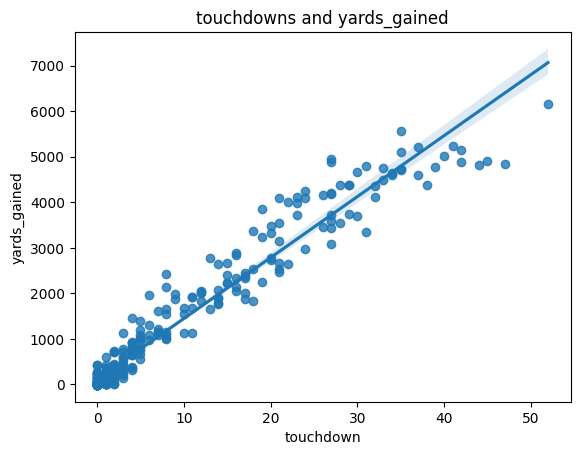

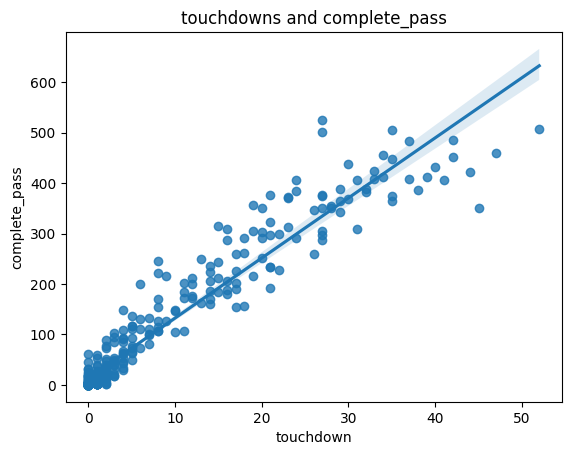

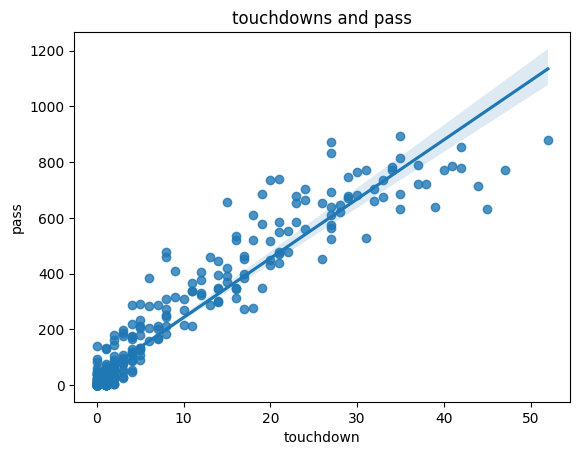

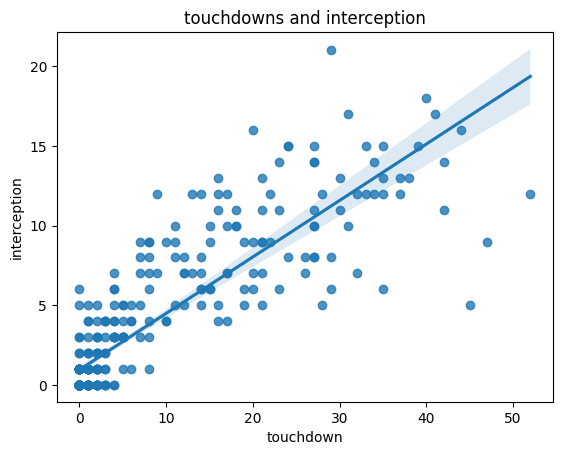

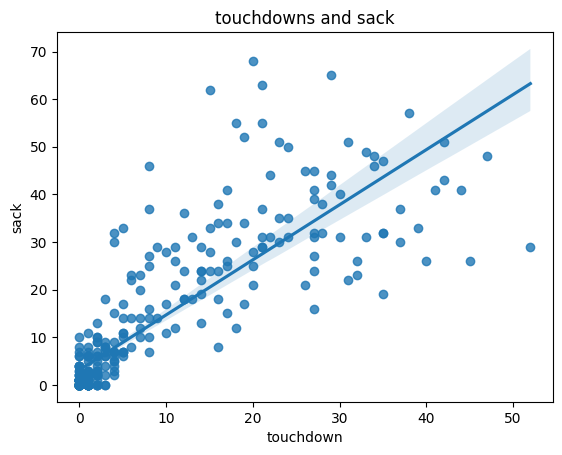

In [ ]:

for y in ['yards_gained', 'complete_pass',
          'pass', 'interception','sack']:
  sns.regplot(data=qb_df, x='touchdown', y=y)
  plt.title(f"touchdowns and {y}")
  plt.show()

In [ ]:

_df = qb_df.copy()

_df['season'] = _df['season'].add(1)

new_qb_df = (qb_df
             .merge(_df,
                    on=['season', 'passer_id', 'passer',],
                    suffixes=('', '_prev'),
                    how='left'))

new_qb_df.sample(10)

,season,passer_id,passer,pass,complete_pass,interception,sack,yards_gained,touchdown,pass_prev,complete_pass_prev,interception_prev,sack_prev,yards_gained_prev,touchdown_prev
1,2022,00-0022824,A.Lee,1,1.0,0.0,0.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
338,2024,00-0039398,J.Milton,34,22.0,0.0,0.0,254.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
293,2024,00-0035710,D.Jones,410,216.0,7.0,29.0,1978.0,9.0,221.0,108.0,6.0,30.0,902.0,4.0
34,2022,00-0032792,N.Sudfeld,1,0.0,0.0,1.0,-7.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
283,2024,00-0034855,B.Mayfield,714,422.0,16.0,41.0,4826.0,44.0,773.0,412.0,12.0,48.0,4645.0,34.0
50,2022,00-0033869,M.Trubisky,206,117.0,5.0,11.0,1204.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
247,2024,00-0031237,T.Bridgewater,1,1.0,0.0,0.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
286,2024,00-0034960,J.Meyers,1,0.0,0.0,1.0,-10.0,0.0,4.0,2.0,0.0,0.0,17.0,2.0
188,2023,00-0036264,J.Love,723,409.0,13.0,30.0,4595.0,37.0,20.0,14.0,0.0,0.0,195.0,1.0
228,2023,00-0038977,N.Dell,1,0.0,0.0,1.0,-1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


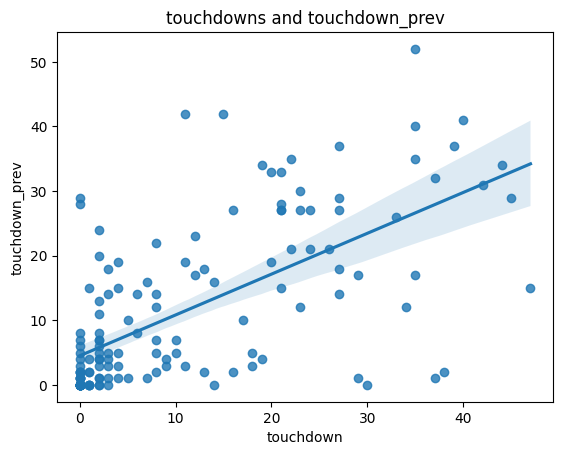

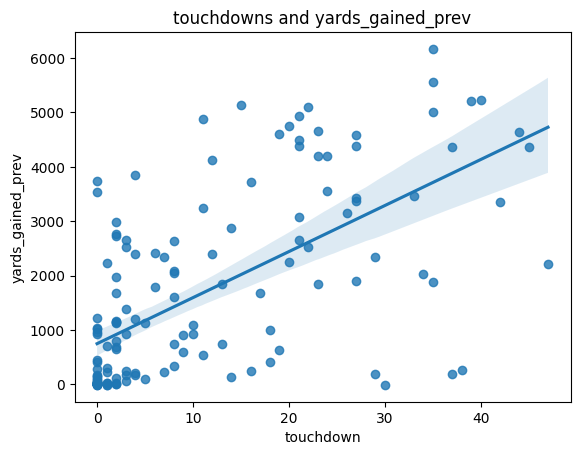

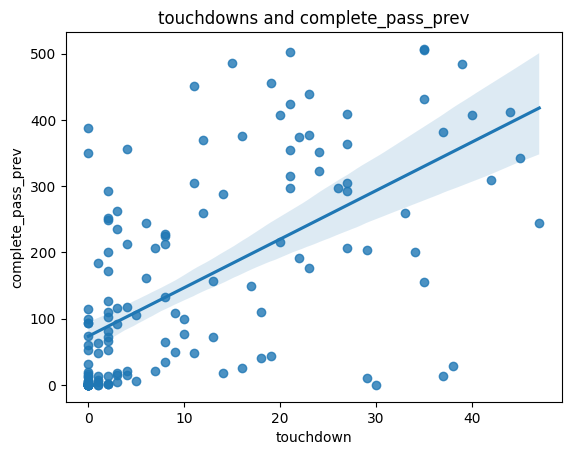

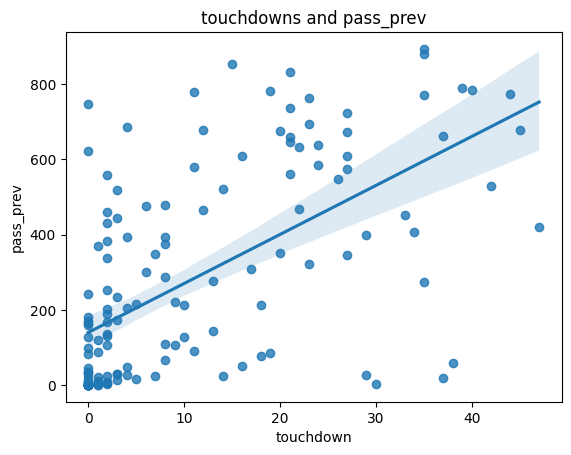

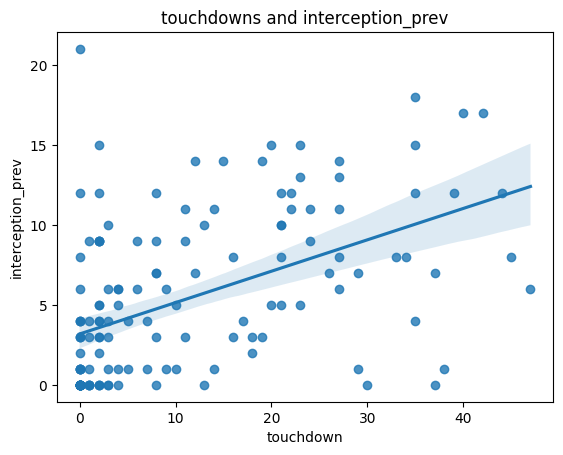

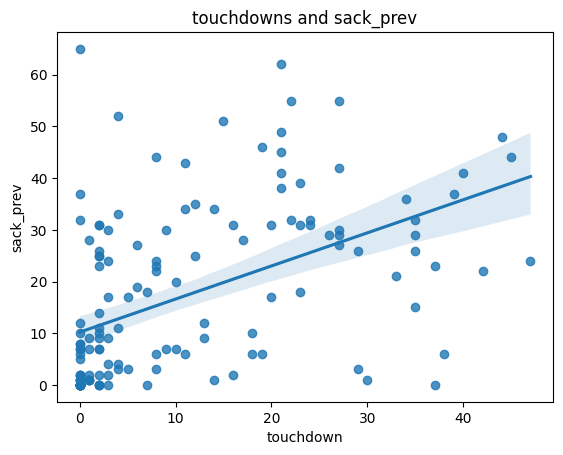

In [ ]:
for y in ['touchdown_prev','yards_gained_prev',
          'complete_pass_prev', 'pass_prev',
          'interception_prev','sack_prev']:
  sns.regplot(data=new_qb_df, x='touchdown', y=y)
  plt.title(f"touchdowns and {y}")
  plt.show()


In [ ]:
# Let's load in machine learning and stats packages
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

In [ ]:
# We will "train" our data on one season and "test"
# on the next season. If you are unfamiliar with
# the concept of train test splitting, I suggest

# Let's use the previous season performance as
# our features for our model
features = ['pass_prev', 'complete_pass_prev',
            'interception_prev', 'sack_prev',
            'yards_gained_prev', 'touchdown_prev']

# We are predicting "current" season touchdowns
target = 'touchdown'

# Let's make a subset of data that has
# no null values
model_data = (new_qb_df
              .dropna(subset=features+[target]))

# train on 2020 data
train_data = (model_data
              .loc[model_data['season']==2023])

# test on 2021 data (data the model hasn't seen)
test_data = (model_data
             .loc[model_data['season']==2024])

# initialize the linear regression
model = LinearRegression()

# fit, or "train", the model on the training data
model.fit(train_data.loc[:, features],
          train_data[target])

# predict on the test data
preds = model.predict(test_data.loc[:, features])

# don't forget to set an index so your
# predictions match the correct rows
preds = pd.Series(preds, index=test_data.index)

# join your predictions back to your test dataset
test_data['preds'] = preds

<ipython-input-220-b362f9dd95fc>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['preds'] = preds


In [ ]:
# Let's run some basic statistics to examine the
# quality of the prediction

rmse = mean_squared_error(test_data['touchdown'], test_data['preds'])**0.5
r2 = pearsonr(test_data['touchdown'], test_data['preds'])[0]**2
print(f"rmse: {rmse}\nr2: {r2}")

rmse: 10.350746638763487
r2: 0.3667492005815546


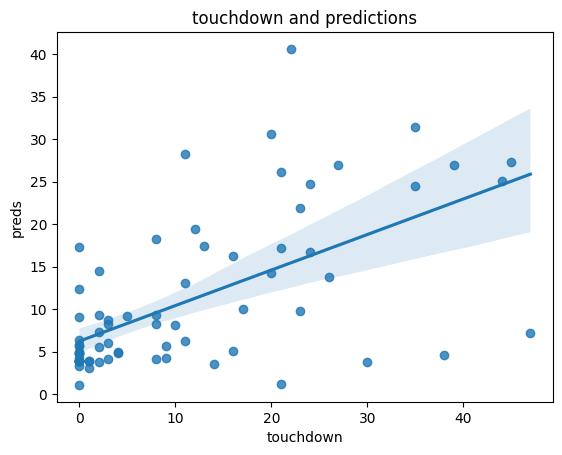

In [ ]:
# Let's visualize the outputs
sns.regplot(data=test_data, x='touchdown', y='preds')
plt.title('touchdown and predictions')
plt.show()

### Enter QB first intial. last name

In [ ]:
test_data.loc[:, ['season',  'passer', 'complete_pass', 'interception',
            'sack', 'yards_gained','touchdown']].sort_values('touchdown', ascending=False).head(32)

qb_name = input("Enter quarterback First initial, Last Name: ")
qb_prediction = test_data.loc[test_data['passer'] == qb_name, ['season',  'passer', 'complete_pass', 'interception',
            'sack', 'yards_gained', 'touchdown' ]]
if qb_prediction.empty:
    print(f"No data found for {qb_name}.")
else:
  print(qb_prediction)

Enter quarterback First initial, Last Name: J.Jackson
No data found for J.Jackson.


## **-Wide Receiver Stat Prediction-**

### Wide Recevier Season Prediction

In [ ]:
wr_feats = ['season', 'receiver_id', 'receiver',
            'yards_after_catch', 'receiving_yards',
             'yards_gained', 'touchdown']
groupby_feats = ['season', 'receiver_id', 'receiver']

wr_df = (df
         .loc[:, wr_feats]
         .groupby(groupby_feats,
                  as_index=False)
         .sum())

wr_df.sample(10)

,season,receiver_id,receiver,yards_after_catch,receiving_yards,yards_gained,touchdown
1265,2024,00-0037197,I.Pacheco,138.0,96.0,96.0,0.0
735,2023,00-0035973,P.Taylor,59.0,49.0,49.0,0.0
156,2022,00-0034054,R.Cracraft,26.0,102.0,102.0,2.0
1200,2024,00-0036407,J.Jeudy,387.0,1229.0,1233.0,4.0
137,2022,00-0033871,C.Davis,109.0,536.0,536.0,2.0
272,2022,00-0035657,D.Harris,86.0,97.0,97.0,0.0
980,2023,00-0038979,C.Tillman,88.0,224.0,224.0,1.0
1379,2024,00-0038738,H.Luepke,84.0,111.0,111.0,0.0
650,2023,00-0034521,A.Lazard,56.0,311.0,311.0,1.0
274,2022,00-0035662,M.Brown,236.0,709.0,709.0,4.0


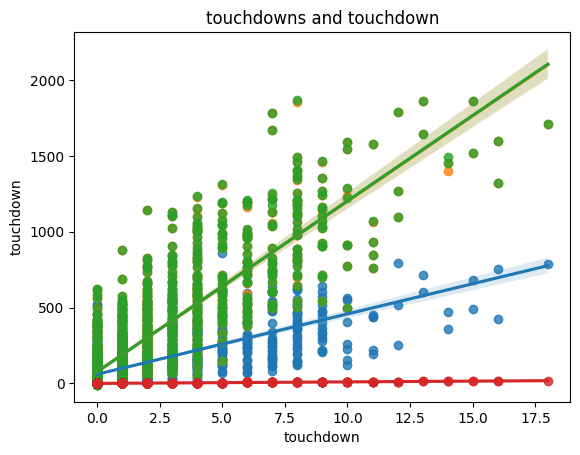

In [ ]:
for y in ['yards_after_catch', 'receiving_yards',
             'yards_gained', 'touchdown']:
  sns.regplot(data=wr_df, x='touchdown', y=y)
  plt.title(f"touchdowns and {y}")

In [ ]:

_df = wr_df.copy()
_df['season'] = _df['season'].add(1)
new_wr_df = (wr_df
             .merge(_df,
                    on=['season', 'receiver_id', 'receiver'],
                    suffixes=('', '_prev'),
                    how='left'))

new_wr_df.sample(10)

,season,receiver_id,receiver,yards_after_catch,receiving_yards,yards_gained,touchdown,yards_after_catch_prev,receiving_yards_prev,yards_gained_prev,touchdown_prev
121,2022,00-0033536,M.Williams,324.0,895.0,895.0,4.0,NaN,NaN,NaN,NaN
990,2023,00-0039062,J.Mingo,155.0,418.0,418.0,1.0,NaN,NaN,NaN,NaN
1315,2024,00-0037746,B.Robinson,207.0,181.0,181.0,0.0,410.0,368.0,368.0,4.0
862,2023,00-0037257,Dav.Bell,88.0,221.0,221.0,3.0,69.0,214.0,214.0,0.0
242,2022,00-0035341,T.Irwin,62.0,250.0,250.0,4.0,NaN,NaN,NaN,NaN
1443,2024,00-0039410,R.Flournoy,34.0,102.0,102.0,0.0,NaN,NaN,NaN,NaN
1296,2024,00-0037509,S.McCormick,29.0,29.0,29.0,0.0,NaN,NaN,NaN,NaN
657,2023,00-0034764,M.Gallup,141.0,521.0,521.0,2.0,116.0,470.0,470.0,5.0
412,2022,00-0036936,R.Moore,281.0,414.0,414.0,1.0,NaN,NaN,NaN,NaN
122,2022,00-0033553,J.Conner,376.0,300.0,300.0,1.0,NaN,NaN,NaN,NaN


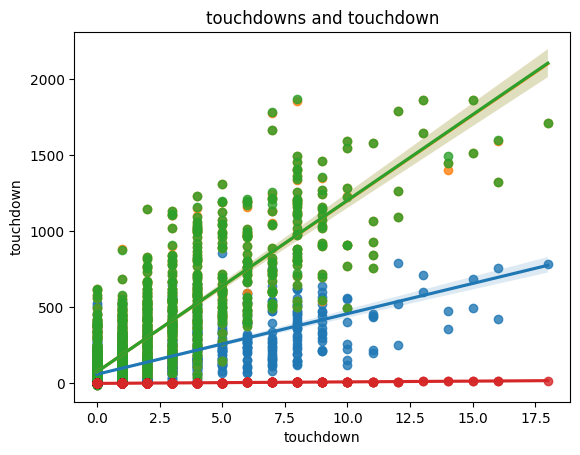

In [ ]:
for y in ['yards_after_catch', 'receiving_yards',
             'yards_gained', 'touchdown']:
  sns.regplot(data=new_wr_df, x='touchdown', y=y)
  plt.title(f"touchdowns and {y}")

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

In [ ]:

features = ['yards_after_catch_prev', 'receiving_yards_prev',
             'yards_gained_prev', 'touchdown_prev']

target = 'touchdown'

model_data = (new_wr_df
              .dropna(subset=features+[target]))

train_data = (model_data
              .loc[model_data['season']==2023])

test_data = (model_data
             .loc[model_data['season']==2024])

model = LinearRegression()

model.fit(train_data.loc[:, features],
          train_data[target])

preds = model.predict(test_data.loc[:, features])

preds = pd.Series(preds, index=test_data.index)
test_data['preds'] = preds

<ipython-input-245-c1f6a8eb9c2f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['preds'] = preds


In [ ]:
rmse = mean_squared_error(test_data['touchdown'], test_data['preds'])**0.5
r2 = pearsonr(test_data['touchdown'], test_data['preds'])[0]**2
print(f"rmse: {rmse}\nr2: {r2}")

rmse: 2.271121550460784
r2: 0.38321631408786694


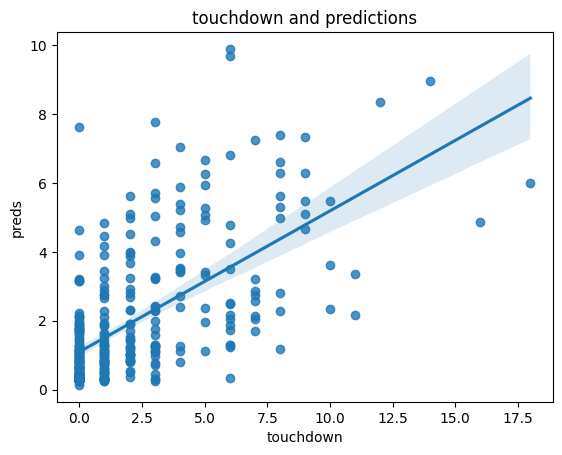

In [ ]:
sns.regplot(data=test_data, x='touchdown', y='preds')
plt.title('touchdown and predictions')
plt.show()

### Enter WR first intial. last name

In [ ]:
test_data.loc[:, ['season', 'receiver','yards_after_catch', 'receiving_yards','yards_gained', 'touchdown']].sort_values('touchdown', ascending=False).head(32)

wr_name = input("Enter Wide Recevier First initial, Last Name: ")
wr_prediction = test_data.loc[test_data['receiver'] == wr_name, ['season', 'receiver','yards_after_catch', 'receiving_yards','yards_gained', 'touchdown']]
if wr_prediction.empty:
    print(f"No data found for {wr_name}.")
else:
  print(wr_prediction)

Enter Wide Recevier First initial, Last Name: J.Chase
      season receiver  yards_after_catch  receiving_yards  yards_gained  \
1241    2024  J.Chase              787.0           1708.0        1708.0   

      touchdown  
1241       18.0  


## **-Running Back Stat Prediction-**


### RB code

In [ ]:

rb_feats = ['season', 'rusher_id', 'rusher',
           'yards_gained', 'rushing_yards',
             'rush_attempt', 'rush_touchdown', 'touchdown']

groupby_feats = ['season', 'rusher_id', 'rusher']

rb_df = (df
         .loc[:, rb_feats]
         .groupby(groupby_feats,
                  as_index=False)
         .sum())

rb_df.sample(10)

,season,rusher_id,rusher,yards_gained,rushing_yards,rush_attempt,rush_touchdown,touchdown
93,2022,00-0033537,D.Watson,78.0,78.0,24.0,1.0,1.0
146,2022,00-0034440,J.Jackson,170.0,170.0,43.0,1.0,1.0
840,2024,00-0035289,G.Minshew,0.0,0.0,2.0,0.0,0.0
52,2022,00-0032187,D.Johnson,24.0,24.0,12.0,0.0,0.0
398,2023,00-0030533,M.Barkley,-3.0,-3.0,3.0,0.0,0.0
761,2024,00-0032434,B.Allen,-2.0,-2.0,2.0,0.0,0.0
672,2023,00-0038104,T.Thornton,51.0,51.0,3.0,0.0,0.0
934,2024,00-0037284,M.Araiza,-18.0,-18.0,1.0,0.0,0.0
41,2022,00-0031595,M.Burton,7.0,7.0,5.0,0.0,0.0
977,2024,00-0038496,X.Gipson,5.0,5.0,1.0,0.0,0.0


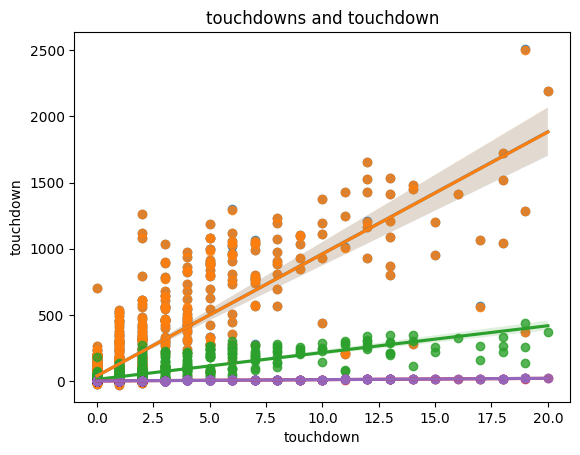

In [ ]:
for y in ['yards_gained', 'rushing_yards',
             'rush_attempt', 'rush_touchdown', 'touchdown']:
  sns.regplot(data=rb_df, x='touchdown', y=y)
  plt.title(f"touchdowns and {y}")

In [ ]:
_df = rb_df.copy()

_df['season'] = _df['season'].add(1)

new_rb_df = (rb_df
             .merge(_df,
                    on=['season', 'rusher_id', 'rusher'],
                    suffixes=('', '_prev'),
                    how='left'))

new_rb_df.sample(10)

,season,rusher_id,rusher,yards_gained,rushing_yards,rush_attempt,rush_touchdown,touchdown,yards_gained_prev,rushing_yards_prev,rush_attempt_prev,rush_touchdown_prev,touchdown_prev
1033,2024,00-0039364,S.Vaki,14.0,14.0,6.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
400,2023,00-0030565,G.Smith,-2.0,-2.0,17.0,0.0,0.0,59.0,59.0,36.0,1.0,1.0
159,2022,00-0034785,M.Cole,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
949,2024,00-0037744,T.McBride,2.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
646,2023,00-0037410,J.Corbin,1.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
916,2024,00-0037091,B.Melton,54.0,54.0,8.0,0.0,0.0,21.0,21.0,3.0,0.0,0.0
517,2023,00-0035184,D.Ozigbo,5.0,5.0,3.0,0.0,0.0,4.0,4.0,3.0,0.0,0.0
1008,2024,00-0038998,J.Haener,-6.0,-6.0,6.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
369,2022,00-0038102,K.Pickett,39.0,39.0,27.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN
1053,2024,00-0039746,W.Shipley,159.0,159.0,34.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN


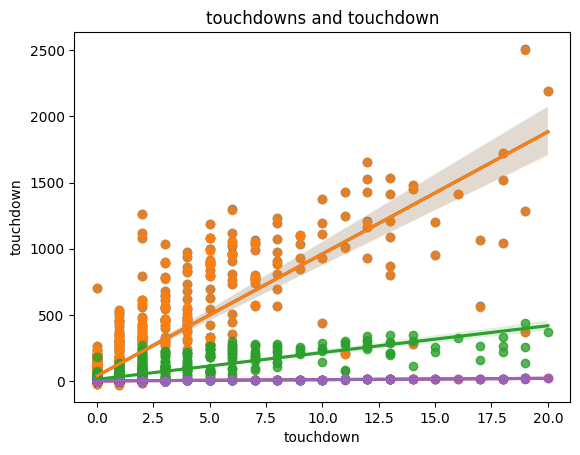

In [ ]:
for y in ['yards_gained', 'rushing_yards',
             'rush_attempt', 'rush_touchdown', 'touchdown']:
  sns.regplot(data=new_rb_df, x='touchdown', y=y)
  plt.title(f"touchdowns and {y}")

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

In [ ]:
new_rb_df.sample(10)

,season,rusher_id,rusher,yards_gained,rushing_yards,rush_attempt,rush_touchdown,touchdown,yards_gained_prev,rushing_yards_prev,rush_attempt_prev,rush_touchdown_prev,touchdown_prev
854,2024,00-0035710,D.Jones,185.0,185.0,53.0,2.0,2.0,46.0,46.0,19.0,1.0,1.0
390,2023,00-0029701,R.Tannehill,30.0,30.0,10.0,1.0,1.0,5.0,5.0,21.0,2.0,2.0
934,2024,00-0037284,M.Araiza,-18.0,-18.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
488,2023,00-0034490,E.Turner,2.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
850,2024,00-0035659,T.McLaurin,2.0,2.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
437,2023,00-0033275,P.Walker,13.0,13.0,9.0,0.0,0.0,13.0,13.0,4.0,0.0,0.0
493,2023,00-0034753,M.Andrews,0.0,0.0,1.0,0.0,0.0,8.0,8.0,4.0,0.0,0.0
186,2022,00-0035184,D.Ozigbo,4.0,4.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
981,2024,00-0038550,H.Hooker,0.0,0.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
742,2024,00-0028118,T.Taylor,0.0,0.0,1.0,0.0,0.0,54.0,54.0,12.0,0.0,0.0


In [ ]:

features = ['yards_gained_prev', 'rushing_yards_prev',
             'rush_attempt_prev', 'rush_touchdown_prev', 'touchdown_prev']

target = 'touchdown'

model_data = (new_rb_df
              .dropna(subset=features+[target]))

train_data = (model_data
              .loc[model_data['season']==2023])

test_data = (model_data
             .loc[model_data['season']==2024])

model = LinearRegression()

model.fit(train_data.loc[:, features],
          train_data[target])

preds = model.predict(test_data.loc[:, features])

preds = pd.Series(preds, index=test_data.index)

test_data['preds'] = preds

<ipython-input-256-4b3906237412>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['preds'] = preds


In [ ]:
rmse = mean_squared_error(test_data['touchdown'], test_data['preds'])**0.5
r2 = pearsonr(test_data['touchdown'], test_data['preds'])[0]**2
print(f"rmse: {rmse}\nr2: {r2}")

rmse: 3.0474753352898887
r2: 0.426742869690915


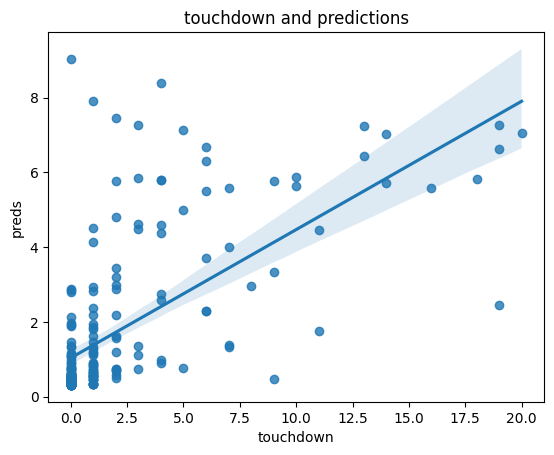

In [ ]:
sns.regplot(data=test_data, x='touchdown', y='preds')
plt.title('touchdown and predictions')
plt.show()

### RB prediction

In [ ]:
test_data.loc[:, ['season', 'rusher_id', 'rusher',
           'yards_gained', 'rushing_yards',
             'rush_attempt', 'rush_touchdown', 'touchdown']].sort_values('touchdown', ascending=False).head(32)

rb_name = input("Enter Running Back First initial, Last Name: ")
rb_prediction = test_data.loc[test_data['rusher'] == rb_name, ['season',  'rusher',
           'yards_gained', 'rushing_yards',
             'rush_attempt', 'rush_touchdown', 'touchdown']]
if rb_prediction.empty:
    print(f"No data found for {rb_name}.")
else:
  print(rb_prediction)

Enter Running Back First initial, Last Name: D.Henry
     season   rusher  yards_gained  rushing_yards  rush_attempt  \
763    2024  D.Henry        2191.0         2191.0         367.0   

     rush_touchdown  touchdown  
763            19.0       20.0  
